In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter

# Set the random seed for reproducibility
np.random.seed(42)

In [3]:
# Load dataset directory (update this path with your actual dataset path)
dataset_dir = '/content/drive/MyDrive/animals'  # Update with your path

# Define the specific classes you want to showcase
specific_classes = ['dog', 'spider', 'elephant']  # Replace with your actual class names

# Get the class names present in the dataset
class_names = os.listdir(dataset_dir)

# Filter to only include the specified classes
class_names = [class_name for class_name in class_names if class_name in specific_classes]

# Get class counts for only the specific classes
class_counts = {class_name: len(os.listdir(os.path.join(dataset_dir, class_name))) for class_name in class_names}

# Create a DataFrame for the class distribution of the selected classes
class_distribution_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Image Count'])
class_distribution_df['Percentage'] = (class_distribution_df['Image Count'] / class_distribution_df['Image Count'].sum()) * 100

# Display the class distribution statistics for the selected classes
print(class_distribution_df)

      Class  Image Count  Percentage
0       dog         4863   43.692722
1  elephant         1446   12.991914
2    spider         4821   43.315364


<ipython-input-4-cca20a1b91ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Image Count', data=class_distribution_df, palette='viridis')


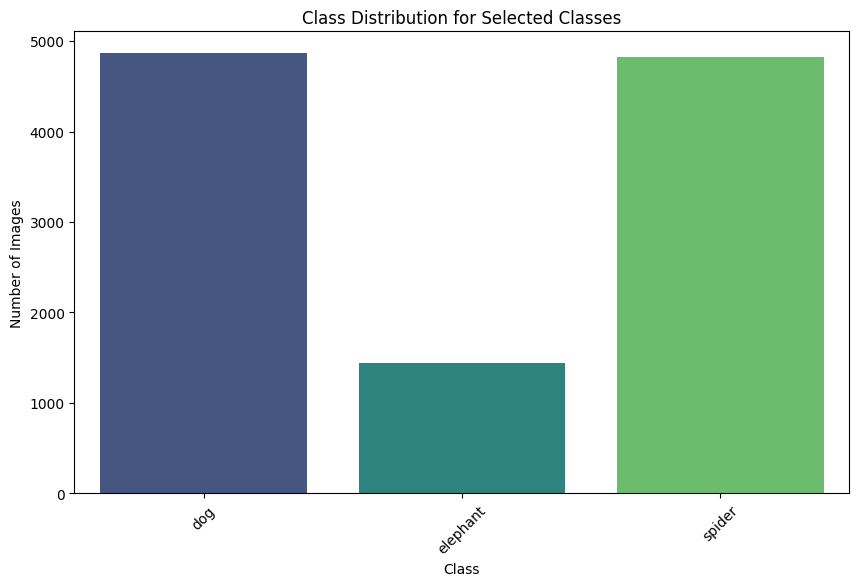

In [4]:
# Visualize class imbalance with bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Image Count', data=class_distribution_df, palette='viridis')
plt.title('Class Distribution for Selected Classes')
plt.xticks(rotation=45)
plt.ylabel('Number of Images')
plt.show()

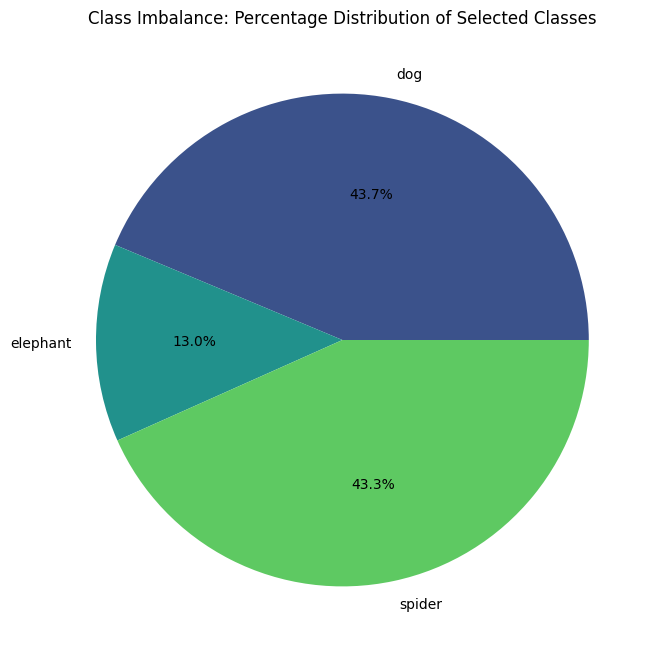

In [5]:
# Pie chart to show the percentage distribution
plt.figure(figsize=(8, 8))
plt.pie(class_distribution_df['Percentage'], labels=class_distribution_df['Class'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(class_names)))
plt.title('Class Imbalance: Percentage Distribution of Selected Classes')
plt.show()

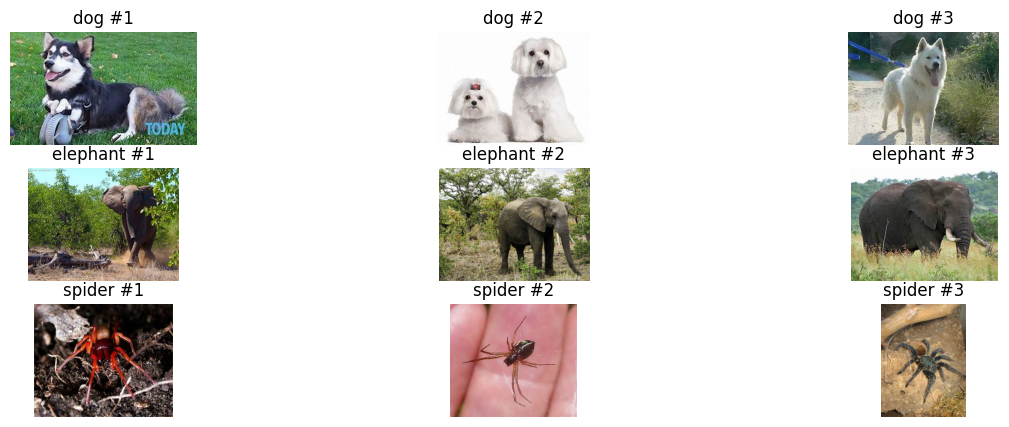

In [6]:
# Display sample images from each selected class
def display_sample_images(dataset_dir, class_names, num_images=3):
    plt.figure(figsize=(15, 5))
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_dir, class_name)
        image_files = os.listdir(class_path)
        sample_images = np.random.choice(image_files, num_images, replace=False)

        for j, image_file in enumerate(sample_images):
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(class_names), num_images, i * num_images + j + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'{class_name} #{j + 1}')
    plt.show()

# Call the function to display samples from the selected classes
display_sample_images(dataset_dir, class_names, num_images=3)

In [7]:
# Train-test split (80% training, 20% testing) for only the selected classes
X = []
y = []
for class_name in class_names:
    class_path = os.path.join(dataset_dir, class_name)
    image_files = os.listdir(class_path)
    for image_file in image_files:
        X.append(cv2.imread(os.path.join(class_path, image_file)))
        y.append(class_name)

# Encode the labels (class names)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Class distribution after the split for selected classes
train_class_counts = Counter(y_train)
test_class_counts = Counter(y_test)

In [8]:
# Create DataFrames for train and test class distributions
train_class_dist = pd.DataFrame(list(train_class_counts.items()), columns=['Class', 'Train Count'])
test_class_dist = pd.DataFrame(list(test_class_counts.items()), columns=['Class', 'Test Count'])

# Merge train and test class distributions
train_test_distribution_df = pd.merge(train_class_dist, test_class_dist, on='Class', how='outer').fillna(0)
train_test_distribution_df['Total'] = train_test_distribution_df['Train Count'] + train_test_distribution_df['Test Count']
train_test_distribution_df['Train Percentage'] = (train_test_distribution_df['Train Count'] / train_test_distribution_df['Total']) * 100
train_test_distribution_df['Test Percentage'] = (train_test_distribution_df['Test Count'] / train_test_distribution_df['Total']) * 100

# Display the train-test distribution comparison for selected classes
print(train_test_distribution_df)

   Class  Train Count  Test Count  Total  Train Percentage  Test Percentage
0      0         3890         973   4863         79.991775        20.008225
1      1         1157         289   1446         80.013831        19.986169
2      2         3857         964   4821         80.004149        19.995851


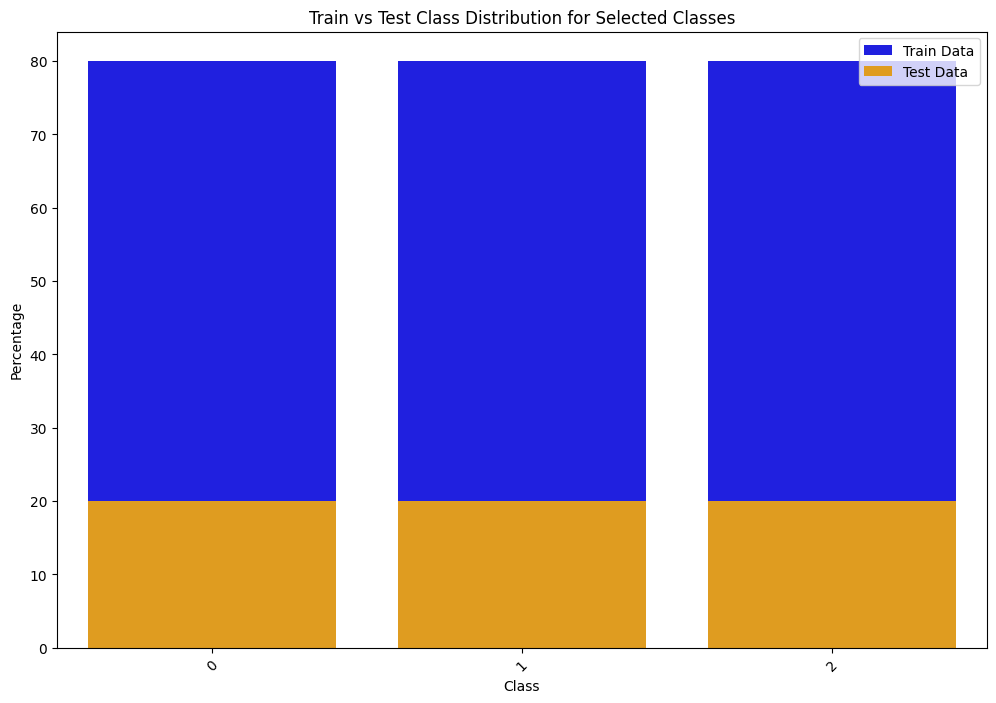

In [9]:
# Plot the train/test split distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='Class', y='Train Percentage', data=train_test_distribution_df, color='blue', label='Train Data')
sns.barplot(x='Class', y='Test Percentage', data=train_test_distribution_df, color='orange', label='Test Data')
plt.title('Train vs Test Class Distribution for Selected Classes')
plt.xticks(rotation=45)
plt.ylabel('Percentage')
plt.legend()
plt.show()

<ipython-input-10-16c7b485e7c0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='coolwarm')


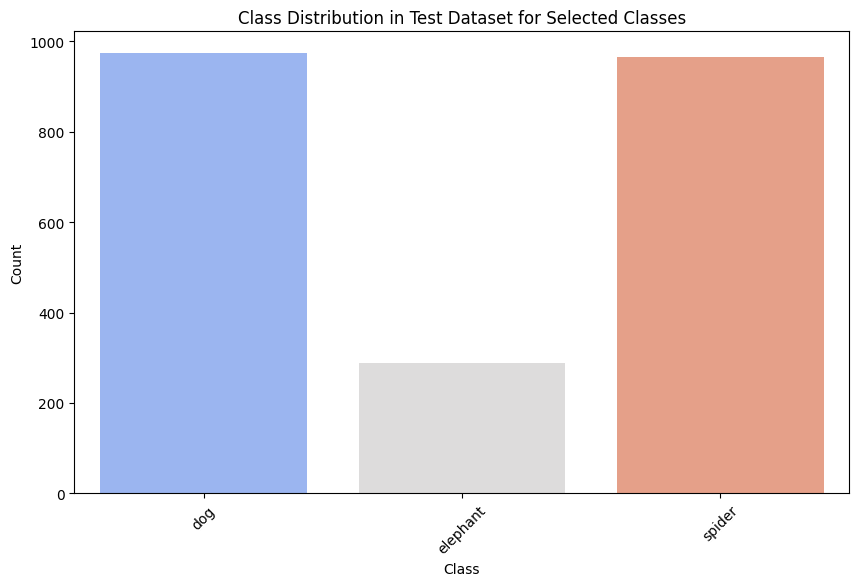

In [10]:
# Visualize class imbalance in the test dataset
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, palette='coolwarm')
plt.title('Class Distribution in Test Dataset for Selected Classes')
plt.xticks(ticks=np.arange(len(class_names)), labels=le.classes_, rotation=45)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()